In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as NewsDetPd
import warnings as NewsDetWng
NewsDetWng.filterwarnings('ignore')
News_Detect = NewsDetPd.read_csv("/content/drive/MyDrive/Colab Notebooks/921458/Code/ProcessedNews_Covid19.csv")
News_Detect

,Text,Label
0,Tencent revealed the real number of deaths.\t\t,0
1,Taking chlorine dioxide helps fight coronavir...,0
2,This video shows workmen uncovering a bat-inf...,0
3,The Asterix comic books and The Simpsons pred...,0
4,Chinese President Xi Jinping visited a mosque...,0
...,...,...
7251,Global COVID-19 prevention trial of hydroxychl...,1
7252,Bavaria's free COVID-19 test for all splits Ge...,1
7253,Britain locks down city of Leicester after COV...,1
7254,UK imposes lockdown on city of Leicester to cu...,1


In [ ]:
News_Detect.info()
News_Detect['Label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7256 non-null   object
 1   Label   7256 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 113.5+ KB


,count
Label,
1,3792
0,3464


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as NewsDet_Tfvect
from sklearn.decomposition import PCA as NewsDetPcomponent
from sklearn.model_selection import train_test_split as NewsDet_trntst

#======== Input and Output
News_DetectX = News_Detect.drop('Label',axis=1)
News_DetectY = News_Detect['Label']

#======== Vectorization Covid19
NewsDetect_Vtc = NewsDet_Tfvect(analyzer='word',ngram_range= (1,1))
News_DetectX = NewsDetect_Vtc.fit_transform(News_Detect['Text'].values.astype('U')).toarray()
print("Vectorized Shape of Covid19 FastText News: ",News_DetectX.shape)

#======== Reducting Dimensions Covid19
newsdetPca = NewsDetPcomponent(n_components = 100)
News_DetectX = newsdetPca.fit_transform(News_DetectX)
print("\nReduction Shape of Covid19 FastText News: ",News_DetectX.shape)

#======== Splitting 60-20-20 ratio Covid19
News_Detect['Label'] = News_Detect['Label'].astype(int)
NewsDetX_tr, NewsDetX_ts, NewsDetY_tr, NewsDetY_ts = NewsDet_trntst(News_DetectX, News_Detect['Label'], test_size=0.4, random_state=70)
NewsDetX_va, NewsDetX_ts, NewsDetY_va, NewsDetY_ts = NewsDet_trntst(NewsDetX_ts, NewsDetY_ts, test_size=0.5, random_state=70)
print("\nTraining Covid19 without FastText News: ",NewsDetX_tr.shape)
print("Validation Covid19 without FastText News: ",NewsDetX_va.shape)
print("Testing Covid19 without FastText News: ",NewsDetX_ts.shape)

Vectorized Shape of Covid19 FastText News:  (7256, 17446)

Reduction Shape of Covid19 FastText News:  (7256, 100)

Training Covid19 without FastText News:  (4353, 100)
Validation Covid19 without FastText News:  (1451, 100)
Testing Covid19 without FastText News:  (1452, 100)


### CNN Model

Note: changing filters as '64' and kernel size as '7', epochs as 100 as common for hypertuning.

3 layers

=============== Performance of CNN 3 Layers Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5290 - loss: 0.2464 - val_accuracy: 0.6072 - val_loss: 0.2169
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6696 - loss: 0.2072 - val_accuracy: 0.7436 - val_loss: 0.1705
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7471 - loss: 0.1653 - val_accuracy: 0.7795 - val_loss: 0.1541
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7830 - loss: 0.1492 - val_accuracy: 0.6837 - val_loss: 0.2192
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7686 - loss: 0.1582 - val_accuracy: 0.7671 - val_loss: 0.1518
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7763 - loss: 0.1501 - val_accuracy: 0.7850 - val_loss: 0.1493
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8118 - loss: 0.1324 - val_accuracy: 0.7588 - val_loss: 0.1553
Epoch 8/100
88/88 ━━━━━━━━━━━

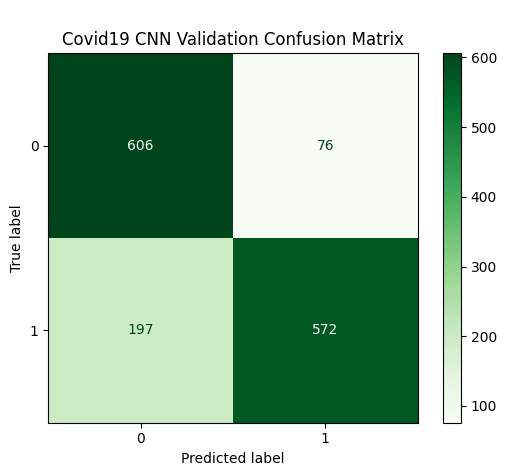

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       670
           1       0.90      0.75      0.81       782

    accuracy                           0.82      1452
   macro avg       0.82      0.82      0.82      1452
weighted avg       0.83      0.82      0.82      1452



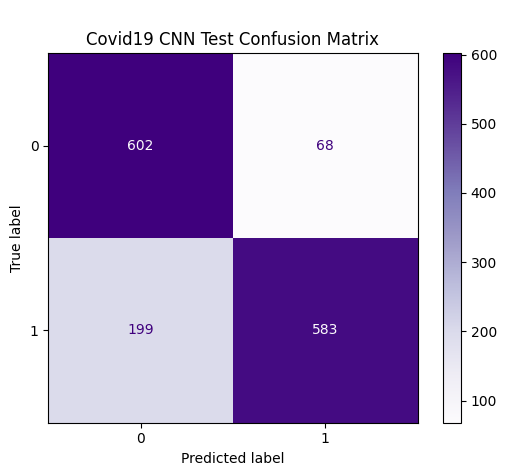

In [ ]:
import numpy as NewsDetNpp
import matplotlib.pyplot as Newsplt
from tensorflow.keras.models import Sequential as NewsDetSeqnt
from tensorflow.keras.optimizers import Adam as NewsDetAdmm
from sklearn.metrics import classification_report as NewsDetClfrpt
from sklearn.metrics import confusion_matrix as NewsDetCnMtrx
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Flatten, Input
from sklearn.metrics import ConfusionMatrixDisplay as NewsDetDsp

NewsDetIp_shape = NewsDetX_tr.shape[1]

#======== Define CNN model for Covid19
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN 3 Layers Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()


4 layers

=============== Performance of CNN 4 Layers Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5295 - loss: 0.2435 - val_accuracy: 0.5858 - val_loss: 0.2358
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6708 - loss: 0.2028 - val_accuracy: 0.6995 - val_loss: 0.2060
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7332 - loss: 0.1763 - val_accuracy: 0.7746 - val_loss: 0.1583
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7828 - loss: 0.1515 - val_accuracy: 0.6933 - val_loss: 0.2013
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7657 - loss: 0.1552 - val_accuracy: 0.7422 - val_loss: 0.1774
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7954 - loss: 0.1426 - val_accuracy: 0.7857 - val_loss: 0.1516
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7855 - loss: 0.1465 - val_accuracy: 0.6768 - val_loss: 0.2358
Epoch 8/100
88/88 ━━━━━━━━━━━

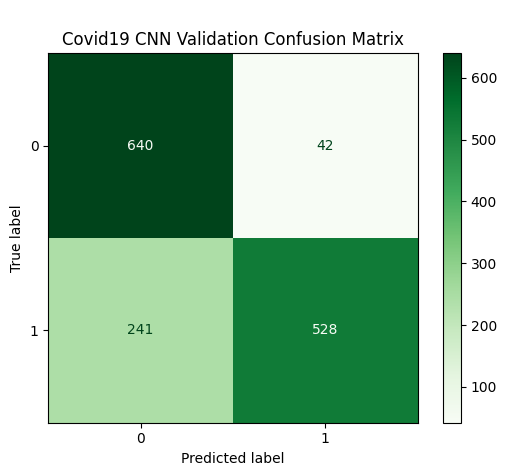

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.95      0.82       670
           1       0.94      0.70      0.80       782

    accuracy                           0.81      1452
   macro avg       0.83      0.82      0.81      1452
weighted avg       0.84      0.81      0.81      1452



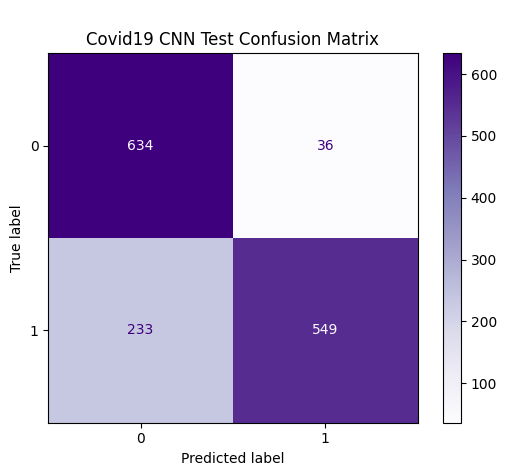

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN 4 Layers Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

5 layers

=============== Performance of CNN 5 Layers Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5649 - loss: 0.2358 - val_accuracy: 0.6154 - val_loss: 0.2105
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6989 - loss: 0.1868 - val_accuracy: 0.7181 - val_loss: 0.2030
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7473 - loss: 0.1758 - val_accuracy: 0.7615 - val_loss: 0.1575
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7561 - loss: 0.1633 - val_accuracy: 0.7498 - val_loss: 0.1766
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7656 - loss: 0.1583 - val_accuracy: 0.6092 - val_loss: 0.2142
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7321 - loss: 0.1734 - val_accuracy: 0.7560 - val_loss: 0.1731
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7862 - loss: 0.1442 - val_accuracy: 0.6334 - val_loss: 0.2481
Epoch 8/100
88/88 ━━━━━━━━━

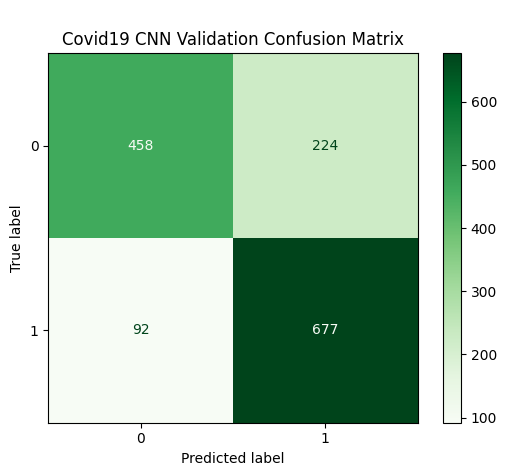

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74       670
           1       0.76      0.89      0.82       782

    accuracy                           0.79      1452
   macro avg       0.80      0.78      0.78      1452
weighted avg       0.79      0.79      0.78      1452



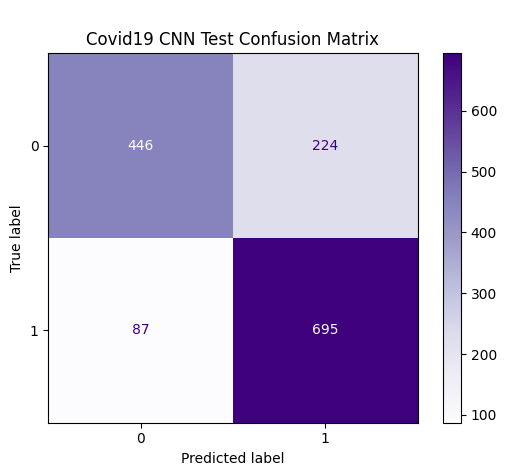

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN 5 Layers Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Activation 'relu'

=============== Performance of CNN Activation 'relu' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5169 - loss: 0.2493 - val_accuracy: 0.5934 - val_loss: 0.2337
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5922 - loss: 0.2265 - val_accuracy: 0.6402 - val_loss: 0.2109
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6544 - loss: 0.2076 - val_accuracy: 0.7167 - val_loss: 0.1846
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7375 - loss: 0.1732 - val_accuracy: 0.7609 - val_loss: 0.1625
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7686 - loss: 0.1562 - val_accuracy: 0.6906 - val_loss: 0.1963
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7433 - loss: 0.1667 - val_accuracy: 0.7733 - val_loss: 0.1526
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8033 - loss: 0.1386 - val_accuracy: 0.7829 - val_loss: 0.1472
Epoch 8/100
88/88 

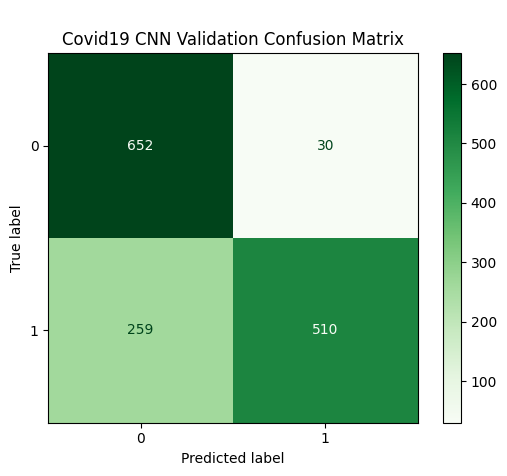

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       670
           1       0.95      0.68      0.79       782

    accuracy                           0.81      1452
   macro avg       0.83      0.82      0.81      1452
weighted avg       0.84      0.81      0.80      1452



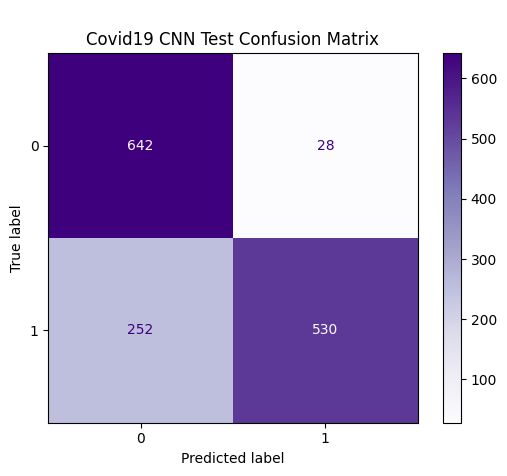

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Activation 'relu' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Activation 'elu'

=============== Performance of CNN Activation 'elu' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5547 - loss: 0.2430 - val_accuracy: 0.6857 - val_loss: 0.1831
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7131 - loss: 0.1826 - val_accuracy: 0.6995 - val_loss: 0.1811
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7391 - loss: 0.1694 - val_accuracy: 0.5658 - val_loss: 0.2837
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6828 - loss: 0.2042 - val_accuracy: 0.7533 - val_loss: 0.1616
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7760 - loss: 0.1509 - val_accuracy: 0.7712 - val_loss: 0.1583
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7903 - loss: 0.1392 - val_accuracy: 0.7746 - val_loss: 0.1465
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7970 - loss: 0.1394 - val_accuracy: 0.7919 - val_loss: 0.1446
Epoch 8/100
88/88 ━

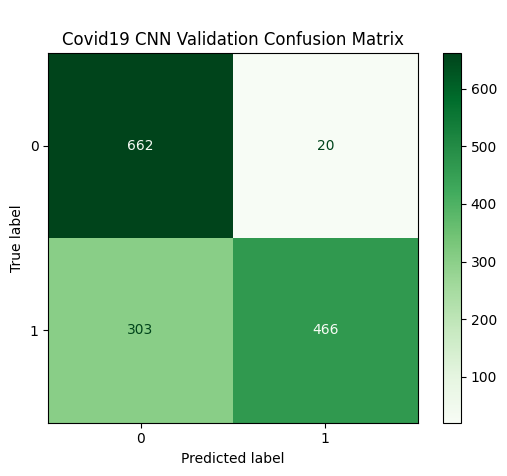

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       670
           1       0.97      0.63      0.76       782

    accuracy                           0.79      1452
   macro avg       0.83      0.80      0.79      1452
weighted avg       0.84      0.79      0.79      1452



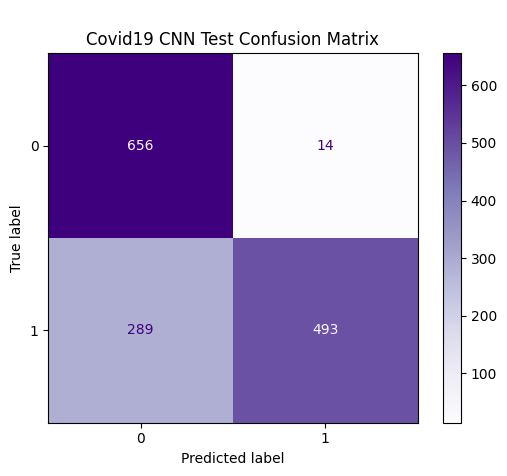

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='elu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='elu'),
    Dense(128, activation='elu'),
    Dense(64, activation='elu'),
    Dense(128, activation='elu'),
    Dense(32, activation='elu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Activation 'elu' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Optimizer 'adamW'

=============== Performance of CNN Optimizer 'adamW' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5118 - loss: 0.2467 - val_accuracy: 0.5830 - val_loss: 0.2243
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6288 - loss: 0.2164 - val_accuracy: 0.7064 - val_loss: 0.1873
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7072 - loss: 0.1842 - val_accuracy: 0.7491 - val_loss: 0.1676
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7448 - loss: 0.1698 - val_accuracy: 0.7595 - val_loss: 0.1559
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7687 - loss: 0.1570 - val_accuracy: 0.7354 - val_loss: 0.1725
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7451 - loss: 0.1726 - val_accuracy: 0.7788 - val_loss: 0.1509
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7644 - loss: 0.1557 - val_accuracy: 0.7815 - val_loss: 0.1470
Epoch 8/100
88/88 

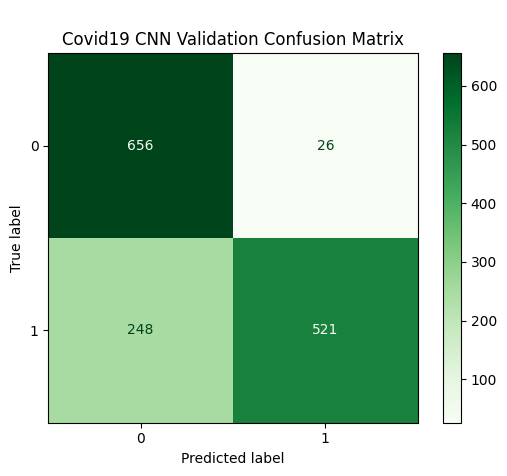

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       670
           1       0.95      0.70      0.81       782

    accuracy                           0.82      1452
   macro avg       0.84      0.83      0.82      1452
weighted avg       0.85      0.82      0.82      1452



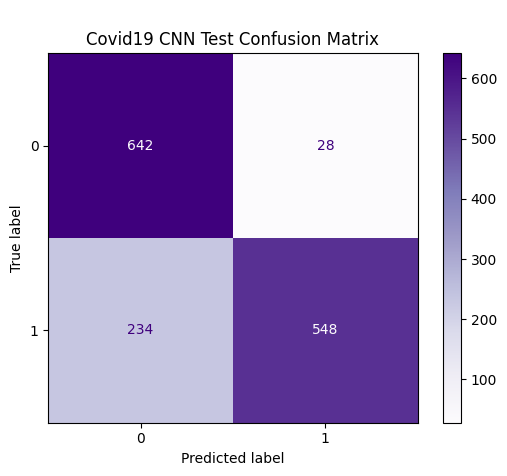

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adamW', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Optimizer 'adamW' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Optimizer 'rmsprop'

=============== Performance of CNN Optimizer 'rmsprop' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5000 - loss: 0.2499 - val_accuracy: 0.5300 - val_loss: 0.2479
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5209 - loss: 0.2448 - val_accuracy: 0.6299 - val_loss: 0.2239
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6253 - loss: 0.2208 - val_accuracy: 0.5899 - val_loss: 0.2273
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6694 - loss: 0.2041 - val_accuracy: 0.6085 - val_loss: 0.2288
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6968 - loss: 0.1912 - val_accuracy: 0.7443 - val_loss: 0.1718
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7184 - loss: 0.1818 - val_accuracy: 0.7491 - val_loss: 0.1666
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7297 - loss: 0.1761 - val_accuracy: 0.5355 - val_loss: 0.3756
Epoch 8/100
88/88 ━

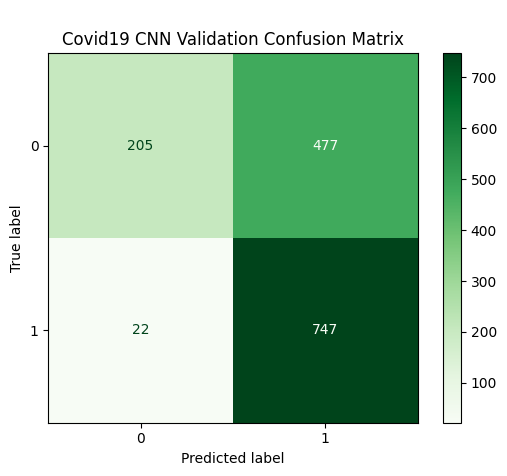

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.29      0.44       670
           1       0.62      0.98      0.76       782

    accuracy                           0.66      1452
   macro avg       0.78      0.64      0.60      1452
weighted avg       0.76      0.66      0.61      1452



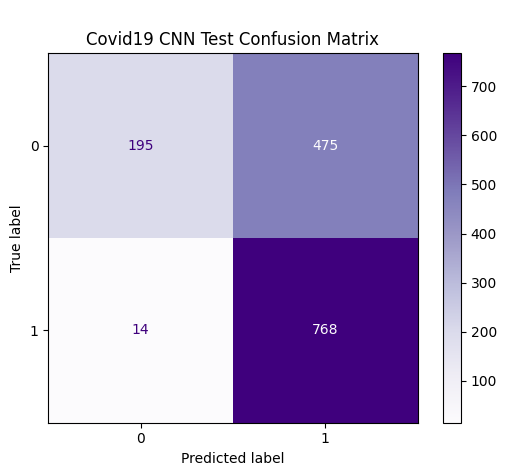

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Optimizer 'rmsprop' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

1. using 3 different hidden layers (3, 4, 5) and this have the activation (tanh), optimizer (adam).
2. take the best layer of 5 and hypertuning the activation (relu) and (elu).
3. take the best activation 'relu' and hypertuning the optimizers (adamW) and (rmsprop).